<a href="https://colab.research.google.com/github/SoumyadipSahoo1/power-BI/blob/main/Customer_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# NumPy for numerical computing
import numpy as np

# Pandas for DataFrames
import pandas as pd
pd.set_option('display.max_columns', 100)

# Matplotlib for visualization
from matplotlib import pyplot as plt
# display plots in the notebook
%matplotlib inline

# Seaborn for easier visualization
import seaborn as sns

# Ignore Warnings
import warnings
warnings.filterwarnings("ignore")

# StandardScaler from Scikit-Learn
from sklearn.preprocessing import StandardScaler

# PCA from Scikit-Learn
from sklearn.decomposition import PCA

# Scikit-Learn's KMeans algorithm
from sklearn.cluster import KMeans

# Adjusted Rand index
from sklearn.metrics import adjusted_rand_score

In [ ]:
# Load international online transactions data from CSV
df = pd.read_csv('/content/drive/MyDrive/files/int_online_tx.csv')

In [ ]:
#Dataframe dimension
df.shape

(35116, 8)

In [ ]:
# First 10 rows of data
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536370,22728,ALARM CLOCK BAKELIKE PINK,24,12/1/10 8:45,3.75,12583.0,France
1,536370,22727,ALARM CLOCK BAKELIKE RED,24,12/1/10 8:45,3.75,12583.0,France
2,536370,22726,ALARM CLOCK BAKELIKE GREEN,12,12/1/10 8:45,3.75,12583.0,France
3,536370,21724,PANDA AND BUNNIES STICKER SHEET,12,12/1/10 8:45,0.85,12583.0,France
4,536370,21883,STARS GIFT TAPE,24,12/1/10 8:45,0.65,12583.0,France
5,536370,10002,INFLATABLE POLITICAL GLOBE,48,12/1/10 8:45,0.85,12583.0,France
6,536370,21791,VINTAGE HEADS AND TAILS CARD GAME,24,12/1/10 8:45,1.25,12583.0,France
7,536370,21035,SET/2 RED RETROSPOT TEA TOWELS,18,12/1/10 8:45,2.95,12583.0,France
8,536370,22326,ROUND SNACK BOXES SET OF4 WOODLAND,24,12/1/10 8:45,2.95,12583.0,France
9,536370,22629,SPACEBOY LUNCH BOX,24,12/1/10 8:45,1.95,12583.0,France


<Axes: xlabel='count', ylabel='Country'>

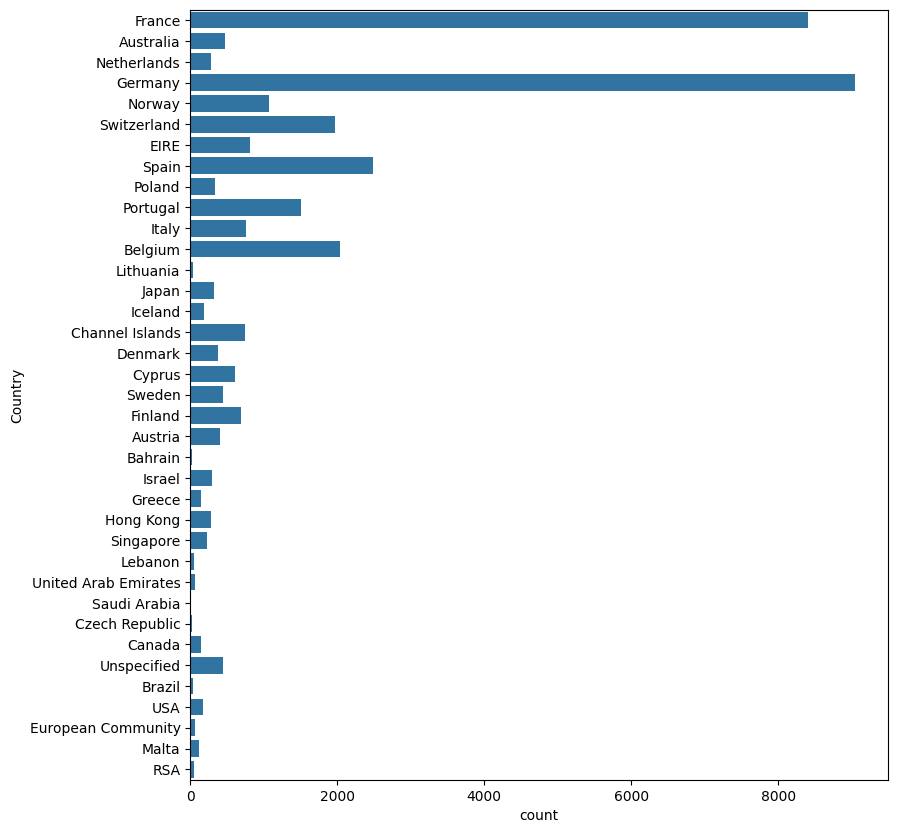

In [ ]:
# Make figsize
plt.figure(figsize=(9,10))

# Bar plot by country
sns.countplot(y='Country', data=df)

In [ ]:
# Missing data by feature
df.isnull().sum()

,0
InvoiceNo,0
StockCode,0
Description,0
Quantity,0
InvoiceDate,0
UnitPrice,0
CustomerID,1418
Country,0


In [ ]:
# Only keep transactions with CustomerID's
df = df[df.CustomerID.notnull()]

In [ ]:
# Convert customer ID's into integers
df['CustomerID'] = df.CustomerID.astype(int)

# Display first 5 CustomerID's in the transaction dataset
df.CustomerID.head()

,CustomerID
0,12583
1,12583
2,12583
3,12583
4,12583


In [ ]:
# Create 'Sales' interaction feature
df['Sales'] = df.Quantity * df.UnitPrice

# Display first 5 Sales values in the transaction dataset
df.Sales.head()

,Sales
0,90.0
1,90.0
2,45.0
3,10.2
4,15.6


In [ ]:
# Save cleaned transaction-level data
df.to_csv('/content/drive/MyDrive/files/cleaned_transactions.csv', index=None)

In [ ]:
# Aggegrate invoice data
invoice_data = df.groupby('CustomerID').InvoiceNo.agg('nunique')

# Rename the aggregated column
invoice_data = invoice_data.rename('total_transactions')

# Display invoice data for first 5 customers
display(invoice_data.head())

,total_transactions
CustomerID,
12347,7
12348,4
12349,1
12350,1
12352,8


In [ ]:
# Aggregate product data
product_data = df.groupby('CustomerID').StockCode.agg( ['count', 'nunique'] )

# Rename the aggregated columns
product_data = product_data.rename(columns={'count': 'total_products', 'nunique': 'total_unique_products'})

# Display product data for first 5 customers
display(product_data.head())

,total_products,total_unique_products
CustomerID,,
12347,182,103
12348,31,22
12349,73,73
12350,17,17
12352,85,59


In [ ]:
# Roll up sales data
sales_data = df.groupby('CustomerID').Sales.agg(['sum', 'mean'])

# Rename the aggregated columns
sales_data = sales_data.rename(columns={'sum': 'total_sales', 'mean': 'avg_product_value'})

# Display sales data for first 5 customers
sales_data.head()

,total_sales,avg_product_value
CustomerID,,
12347,4310.00,23.681319
12348,1797.24,57.975484
12349,1757.55,24.076027
12350,334.40,19.670588
12352,2506.04,29.482824


In [ ]:
# Aggregate cart-level data (i.e. invoice-level)
cart_data = df.groupby(['CustomerID' , 'InvoiceNo']).Sales.agg('sum')

# Rename the aggregated column
cart_data = cart_data.rename('cart_value')

# Display cart data for first 20 CARTS
cart_data.head(20)

CustomerID  InvoiceNo
12347       537626        711.79
            542237        475.39
            549222        636.25
            556201        382.52
            562032        584.91
            573511       1294.32
            581180        224.82
12348       539318        892.80
            541998        227.44
            548955        367.00
            568172        310.00
12349       577609       1757.55
12350       543037        334.40
12352       544156        296.50
            545323        144.35
            545332        840.30
            546869        120.33
            547390        160.33
            567505        366.25
            568699        266.25
Name: cart_value, dtype: float64

In [ ]:
# Reset index
cart_data = cart_data.reset_index()

# Display cart data for first 10 CARTS
cart_data.head(10)

,CustomerID,InvoiceNo,cart_value
0,12347,537626,711.79
1,12347,542237,475.39
2,12347,549222,636.25
3,12347,556201,382.52
4,12347,562032,584.91
5,12347,573511,1294.32
6,12347,581180,224.82
7,12348,539318,892.80
8,12348,541998,227.44
9,12348,548955,367.00


In [ ]:
# Aggregate cart data at the customer level
agg_cart_data = cart_data.groupby('CustomerID')['cart_value'].agg(
    avg_cart_value='mean',
    min_cart_value='min',
    max_cart_value='max'
).reset_index()

# Display cart data for the first 5 customers
agg_cart_data.head()

,CustomerID,avg_cart_value,min_cart_value,max_cart_value
0,12347,615.714286,224.82,1294.32
1,12348,449.310000,227.44,892.80
2,12349,1757.550000,1757.55,1757.55
3,12350,334.400000,334.40,334.40
4,12352,313.255000,120.33,840.30


In [ ]:
# Join together customer-level data
customer_df = invoice_data.to_frame().join([product_data, sales_data, agg_cart_data])

# Display customer-level data for first 5 customers
customer_df.head()

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,CustomerID,avg_cart_value,min_cart_value,max_cart_value
CustomerID,,,,,,,,,
12347,7.0,182.0,103.0,4310.00,23.681319,NaN,NaN,NaN,NaN
12348,4.0,31.0,22.0,1797.24,57.975484,NaN,NaN,NaN,NaN
12349,1.0,73.0,73.0,1757.55,24.076027,NaN,NaN,NaN,NaN
12350,1.0,17.0,17.0,334.40,19.670588,NaN,NaN,NaN,NaN
12352,8.0,85.0,59.0,2506.04,29.482824,NaN,NaN,NaN,NaN


In [ ]:
# Save analytical base table
customer_df.to_csv('/content/drive/MyDrive/files/analytical_base_table.csv')

In [ ]:
# Read cleaned_transactions.csv
df = pd.read_csv('/content/drive/MyDrive/files/cleaned_transactions.csv')

In [ ]:
# Get item_dummies - creates the vector of StockCode
item_dummies = pd.get_dummies(df.StockCode)

item_dummies.head()

,10002,10120,10125,10133,10135,11001,15034,15036,15039,15044A,15044B,15044C,15044D,15056BL,15056N,15056P,15058A,15058B,15058C,15060B,16008,16011,16012,16014,16016,16045,16048,16054,16156L,16156S,16161G,16161P,16161U,16168M,16169E,16169K,16169M,16218,16219,16225,16235,16236,16237,16238,16258A,16259,17003,17011F,17012A,17012B,...,85231B,85232A,85232B,85232D,90001B,90001D,90013A,90013C,90018C,90019A,90024B,90030A,90030B,90030C,90031,90036E,90037B,90057,90070,90087,90098,90099,90108,90114,90120B,90145,90160A,90160B,90160C,90160D,90161B,90161C,90161D,90162A,90162B,90164A,90170,90173,90184B,90184C,90192,90201A,90201B,90201C,90201D,90202D,90204,C2,M,POST
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False


In [ ]:
# Add CustomerID to item_dummies
item_dummies['CustomerID'] = df.CustomerID

# Display first 5 rows of item_dummies
item_dummies.head()

,10002,10120,10125,10133,10135,11001,15034,15036,15039,15044A,15044B,15044C,15044D,15056BL,15056N,15056P,15058A,15058B,15058C,15060B,16008,16011,16012,16014,16016,16045,16048,16054,16156L,16156S,16161G,16161P,16161U,16168M,16169E,16169K,16169M,16218,16219,16225,16235,16236,16237,16238,16258A,16259,17003,17011F,17012A,17012B,...,85232A,85232B,85232D,90001B,90001D,90013A,90013C,90018C,90019A,90024B,90030A,90030B,90030C,90031,90036E,90037B,90057,90070,90087,90098,90099,90108,90114,90120B,90145,90160A,90160B,90160C,90160D,90161B,90161C,90161D,90162A,90162B,90164A,90170,90173,90184B,90184C,90192,90201A,90201B,90201C,90201D,90202D,90204,C2,M,POST,CustomerID
0,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,12583
1,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,12583
2,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,12583
3,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,12583
4,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,12583


In [ ]:
# Create item_data by aggregating at customer level
item_data = item_dummies.groupby('CustomerID').sum()

# Display first 5 rows of item_data
item_data.head()

,10002,10120,10125,10133,10135,11001,15034,15036,15039,15044A,15044B,15044C,15044D,15056BL,15056N,15056P,15058A,15058B,15058C,15060B,16008,16011,16012,16014,16016,16045,16048,16054,16156L,16156S,16161G,16161P,16161U,16168M,16169E,16169K,16169M,16218,16219,16225,16235,16236,16237,16238,16258A,16259,17003,17011F,17012A,17012B,...,85231B,85232A,85232B,85232D,90001B,90001D,90013A,90013C,90018C,90019A,90024B,90030A,90030B,90030C,90031,90036E,90037B,90057,90070,90087,90098,90099,90108,90114,90120B,90145,90160A,90160B,90160C,90160D,90161B,90161C,90161D,90162A,90162B,90164A,90170,90173,90184B,90184C,90192,90201A,90201B,90201C,90201D,90202D,90204,C2,M,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
12348,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
12349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
12352,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,5


In [ ]:
# Total times each item was purchased
item_data.sum()

,0
10002,12
10120,1
10125,13
10133,5
10135,4
...,...
90202D,1
90204,1
C2,6
M,34


In [ ]:
# Save item_data.csv
item_data.to_csv('/content/drive/MyDrive/files/item_data.csv')

In [ ]:
# Display most popular 20 items
item_data.sum().sort_values().tail(120)

,0
22847,50
85014B,50
15056BL,50
22748,50
23159,50
...,...
22556,179
22554,197
22423,222
22326,271


In [ ]:
# Get list of StockCodes for the 20 most popular items
top_20_items = item_data.sum().sort_values().tail(120).index

top_20_items

Index(['22847', '85014B', '15056BL', '22748', '23159', '23231', '23388',
       '22898', '23243', '22966',
       ...
       '21212', '22551', '22629', '22328', '21731', '22556', '22554', '22423',
       '22326', 'POST'],
      dtype='object', length=120)

In [ ]:
# Keep only features for top 20 items
top_20_item_data = item_data[top_20_items]

# Shape of remaining dataframe
top_20_item_data.shape

(414, 120)

In [ ]:
top_20_item_data.head()

,22847,85014B,15056BL,22748,23159,23231,23388,22898,23243,22966,23255,22558,22356,84997C,21558,23292,22699,22385,22331,23480,84375,21242,21156,21122,22417,84997B,22557,22895,22962,23307,20676,21977,22907,21976,20682,23293,23290,84879,22661,22627,22355,22553,23236,22197,22367,20685,21936,22384,23108,22620,...,22631,22090,23199,21915,23203,84997D,22029,23254,23209,22077,22960,23256,22492,22467,22726,23240,22382,23245,21094,21086,23206,22720,22727,22138,22352,21559,22728,22555,20724,20712,22961,22630,22139,21080,20726,85099B,20719,20750,23084,20725,21212,22551,22629,22328,21731,22556,22554,22423,22326,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,1,0,0,0,0,2,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,3,0,3,0,0,0,0,0,0,0,5,0,0,0,3,0,0,0,0,0,0,0,0,0,4,0,3,0,0,0,0,0,5,0,0,4,0,0
12348,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
12349,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,1,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1
12350,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
12352,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,5


In [ ]:
# Save threshold_item_data.csv
top_20_item_data.to_csv('/content/drive/MyDrive/files/threshold_item_data.csv')

In [ ]:
# Read item_data.csv
item_data = pd.read_csv('/content/drive/MyDrive/files/item_data.csv', index_col=0)

In [ ]:
# Display item_data's shape
item_data.shape

(414, 2574)

In [ ]:
# Initialize instance of StandardScaler
scaler = StandardScaler()

# Fit and transform item_data
item_data_scaled = scaler.fit_transform(item_data)

# Display first 5 rows of item_data_scaled
item_data_scaled[:5]

array([[-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.68068072],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183,  0.38776219],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.41356999],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
        -0.15568183, -0.41356999],
       [-0.13303802, -0.04920678, -0.1119152 , ..., -0.10482848,
         5.53128397,  0.65487292]])

In [ ]:
# Initialize and fit a PCA transformation
pca = PCA()
pca.fit(item_data_scaled)

PCA()

In [ ]:
# Generate new features
PC_items = pca.transform(item_data_scaled)

# Display first 5 rows
PC_items[:5]

array([[ 5.87614052e+00,  4.82891689e+00,  4.95545069e-01, ...,
        -6.62646278e-04, -4.43629806e-05,  1.62431140e-15],
       [-4.21983747e+00,  1.22621722e+00,  1.88191211e+00, ...,
        -2.11471782e-04, -2.69154340e-04,  3.19423615e-15],
       [-1.26084676e+00,  2.38766371e+00,  7.31483440e-02, ...,
         2.57750179e-04, -2.05682324e-04,  2.68422745e-15],
       [-4.92931983e+00, -7.14858724e-01,  1.58093026e+00, ...,
        -1.98603886e-03,  9.92316312e-05,  4.26456053e-15],
       [-2.05311348e+00,  2.11095022e+00, -1.84807021e-01, ...,
        -3.43415269e-04, -1.32981672e-04,  6.56480386e-15]])

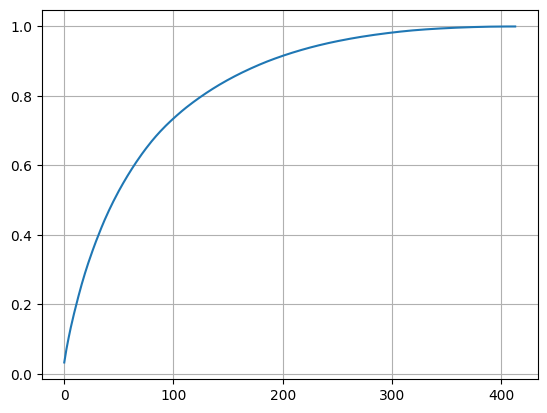

In [ ]:
# Cumulative explained variance
cumulative_explained_variance = np.cumsum(pca.explained_variance_ratio_)

# Plot cumulative explained variance
plt.grid()
plt.plot(range(len(cumulative_explained_variance)), cumulative_explained_variance)

In [ ]:
# How much variance we'd capture with the first 125 components
cumulative_explained_variance[300]

np.float64(0.9824241831916608)

In [ ]:
pca = PCA(n_components=300)

# Fit and transform item_data_scaled
PC_items = pca.fit_transform(item_data_scaled)

# Display shape of PC_items
PC_items.shape

(414, 300)

In [ ]:
# Put PC_items into a dataframe
items_pca = pd.DataFrame(PC_items)

# Name the columns
items_pca.columns = ['PC{}'.format(i + 1) for i in range(PC_items.shape[1])]

# Update its index
items_pca.index = item_data.index

# Display first 5 rows
items_pca.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,PC43,PC44,PC45,PC46,PC47,PC48,PC49,PC50,...,PC251,PC252,PC253,PC254,PC255,PC256,PC257,PC258,PC259,PC260,PC261,PC262,PC263,PC264,PC265,PC266,PC267,PC268,PC269,PC270,PC271,PC272,PC273,PC274,PC275,PC276,PC277,PC278,PC279,PC280,PC281,PC282,PC283,PC284,PC285,PC286,PC287,PC288,PC289,PC290,PC291,PC292,PC293,PC294,PC295,PC296,PC297,PC298,PC299,PC300
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,5.876141,4.828917,0.495545,3.093849,-0.633706,11.534092,2.161996,7.116957,5.336009,4.424414,-4.637002,2.316503,12.310783,1.986696,-11.431269,5.617791,-2.177268,7.665832,-12.135817,-16.049000,-5.949238,7.814288,40.518194,-35.575039,-17.557418,6.869259,20.886868,2.296657,-26.160394,-32.580135,7.880285,12.358371,6.826718,-32.957865,-4.405057,-17.238628,-11.272274,-14.487767,-2.766330,4.736718,-6.985885,-1.464059,-10.603071,1.239909,3.086324,5.336238,-0.410776,-1.616712,6.383660,3.065176,...,-0.069767,0.408927,-0.227427,0.002504,0.097799,0.259338,-0.198065,0.171785,-0.197370,0.123977,0.173750,-0.121119,-0.135572,-0.203975,-0.111506,0.110960,0.127010,0.025954,0.209612,-0.245687,-0.182830,-0.021374,-0.096303,0.039188,-0.063647,-0.011405,-0.048040,-0.001107,-0.002078,0.050271,0.125064,0.115409,0.004186,-0.182065,0.024323,0.054037,-0.123733,0.057863,-0.131213,0.049961,-0.031950,0.012365,-0.030677,-0.167835,-0.065556,-0.048839,0.009856,0.125699,-0.034262,-0.037672
12348,-4.219837,1.226217,1.881912,-0.174340,0.817996,-1.160834,-0.871683,-0.846634,0.460240,0.854274,0.401793,0.981803,-1.104237,0.770190,-0.092975,-0.313393,-0.448633,1.207301,0.381678,-0.469152,0.185789,0.054586,0.499987,0.373514,1.226615,-0.773073,-0.270124,0.850016,-0.370482,-0.573939,1.012802,-0.580828,0.949802,-0.733970,0.353891,-0.387479,-0.298541,0.396418,0.154924,0.333480,-0.466262,0.703453,-1.200580,-0.202163,-0.871793,-0.055068,-0.421733,1.623011,0.397689,0.452589,...,-0.141532,-1.073872,-0.168426,-0.954427,0.944779,-0.932787,-0.510002,0.595278,0.719674,0.330412,1.204762,-1.164581,0.927657,-0.909461,0.141614,1.147447,0.616075,0.801795,-0.124103,0.245646,0.726211,0.389989,0.938083,-0.139684,-0.967807,-0.614376,1.532285,0.757515,0.012091,-0.526982,-0.469967,-0.019878,-0.078408,0.174186,0.143707,-0.086152,0.394233,0.530072,0.148840,-0.374765,-0.763168,0.297914,0.650722,-1.029483,-0.264737,-0.105215,0.006451,0.292343,-1.403258,-1.695189
12349,-1.260847,2.387664,0.073148,-1.119161,-0.034339,3.715390,-0.343602,-0.149045,-0.790001,-0.379234,-1.570091,0.183310,0.223639,-0.051066,3.179090,-0.512679,-1.839577,0.383216,0.317492,-0.003006,-0.420161,0.456437,-0.789675,1.751368,-1.481236,0.757191,-0.912292,0.771947,0.503370,-1.345637,0.286381,0.668565,0.085125,-0.216749,-0.667408,-1.535679,0.783800,-1.418824,-0.098816,-0.929870,0.090829,-0.095242,0.163215,0.700639,1.381550,-0.243736,-0.105135,0.176475,-0.862919,1.685212,...,0.614952,-0.163825,-0.207179,-0.333390,0.981569,0.573643,0.565197,-0.020257,1.069041,0.488184,0.229762,-0.214541,0.471758,0.272983,-0.010731,-0.363467,-0.749107,0.464420,0.386980,-0.076130,0.081972,0.293022,-0.031930,-0.191058,0.161479,0.205176,0.171877,0.080160,0.256457,0.585642,-0.441261,0.113534,0.190729,-0.569251,-0.544519,-0.031469,-0.284680,-0.469459,-0.403032,0.145752,-0.213519,0.423303,0.059435,-0.116916,-0.520084,0.175811,0.000226,0.200348,-0.292348,0.469612
12350,-4.929320,-0.714859,1.580930,-0.469767,-0.116290,-0.647835,0.112904,-1.336313,1.547069,-1.190409,0.213170,1.057289,-0.475002,0.856574,-1.305371,0.242700,0.268312,1.952558,-0.227722,0.569825,-0.186512,0.903530,1.364749,0.178125,-0.260398,-0.168826,-0.681952,1.081305,-0.155239,-0.397164,0.240051,0.634067,-1.447082,-0.186097,-0.315379,-0.306429,-1.359020,-0.001474,0.579057,-0.248313,0.588130,-0.217986,-0.284601,0.525267,-0.531671,-0.101396,-1

In [ ]:
# Save pca_item_data.csv
items_pca.to_csv('/content/drive/MyDrive/files/pca_item_data.csv')

In [ ]:
# Import analytical base table
base_df = pd.read_csv('/content/drive/MyDrive/files/analytical_base_table.csv', index_col=0)

# Import thresholded item features
threshold_item_data = pd.read_csv('/content/drive/MyDrive/files/threshold_item_data.csv', index_col=0)

# Import PCA item features
pca_item_data = pd.read_csv('/content/drive/MyDrive/files/pca_item_data.csv', index_col=0)

In [ ]:
# Print shape of each dataframe
print( base_df.shape )
print( threshold_item_data.shape )
print( pca_item_data.shape )

(414, 9)
(414, 120)
(414, 300)


In [ ]:
# Join base_df with threshold_item_data
threshold_df = base_df.join(threshold_item_data)

# Drop the CustomerID.1 column as it contains NaNs after the join
threshold_df = threshold_df.drop('CustomerID.1', axis=1)

# Display first 5 rows of threshold_df
threshold_df.head()

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,22847,85014B,15056BL,22748,23159,23231,23388,22898,23243,22966,23255,22558,22356,84997C,21558,23292,22699,22385,22331,23480,84375,21242,21156,21122,22417,84997B,22557,22895,22962,23307,20676,21977,22907,21976,20682,23293,23290,84879,22661,22627,22355,22553,...,22631,22090,23199,21915,23203,84997D,22029,23254,23209,22077,22960,23256,22492,22467,22726,23240,22382,23245,21094,21086,23206,22720,22727,22138,22352,21559,22728,22555,20724,20712,22961,22630,22139,21080,20726,85099B,20719,20750,23084,20725,21212,22551,22629,22328,21731,22556,22554,22423,22326,POST
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,7.0,182.0,103.0,4310.00,23.681319,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,0,1,0,0,0,0,2,1,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0,0,0,3,0,3,0,0,0,0,0,0,0,5,0,0,0,3,0,0,0,0,0,0,0,0,0,4,0,3,0,0,0,0,0,5,0,0,4,0,0
12348,4.0,31.0,22.0,1797.24,57.975484,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
12349,1.0,73.0,73.0,1757.55,24.076027,NaN,NaN,NaN,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1
12350,1.0,17.0,17.0,334.40,19.670588,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1
12352,8.0,85.0,59.0,2506.04,29.482824,NaN,NaN,NaN,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,2,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,2,0,5


In [ ]:
# Join base_df with pca_item_data
pca_df = base_df.join(pca_item_data)

# Drop the CustomerID.1 column as it contains NaNs after the join
pca_df = pca_df.drop('CustomerID.1', axis=1)

# Display first 5 rows of pca_df
pca_df.head()

,total_transactions,total_products,total_unique_products,total_sales,avg_product_value,avg_cart_value,min_cart_value,max_cart_value,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11,PC12,PC13,PC14,PC15,PC16,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26,PC27,PC28,PC29,PC30,PC31,PC32,PC33,PC34,PC35,PC36,PC37,PC38,PC39,PC40,PC41,PC42,...,PC251,PC252,PC253,PC254,PC255,PC256,PC257,PC258,PC259,PC260,PC261,PC262,PC263,PC264,PC265,PC266,PC267,PC268,PC269,PC270,PC271,PC272,PC273,PC274,PC275,PC276,PC277,PC278,PC279,PC280,PC281,PC282,PC283,PC284,PC285,PC286,PC287,PC288,PC289,PC290,PC291,PC292,PC293,PC294,PC295,PC296,PC297,PC298,PC299,PC300
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
12347,7.0,182.0,103.0,4310.00,23.681319,NaN,NaN,NaN,5.876141,4.828917,0.495545,3.093849,-0.633706,11.534092,2.161996,7.116957,5.336009,4.424414,-4.637002,2.316503,12.310783,1.986696,-11.431269,5.617791,-2.177268,7.665832,-12.135817,-16.049000,-5.949238,7.814288,40.518194,-35.575039,-17.557418,6.869259,20.886868,2.296657,-26.160394,-32.580135,7.880285,12.358371,6.826718,-32.957865,-4.405057,-17.238628,-11.272274,-14.487767,-2.766330,4.736718,-6.985885,-1.464059,...,-0.069767,0.408927,-0.227427,0.002504,0.097799,0.259338,-0.198065,0.171785,-0.197370,0.123977,0.173750,-0.121119,-0.135572,-0.203975,-0.111506,0.110960,0.127010,0.025954,0.209612,-0.245687,-0.182830,-0.021374,-0.096303,0.039188,-0.063647,-0.011405,-0.048040,-0.001107,-0.002078,0.050271,0.125064,0.115409,0.004186,-0.182065,0.024323,0.054037,-0.123733,0.057863,-0.131213,0.049961,-0.031950,0.012365,-0.030677,-0.167835,-0.065556,-0.048839,0.009856,0.125699,-0.034262,-0.037672
12348,4.0,31.0,22.0,1797.24,57.975484,NaN,NaN,NaN,-4.219837,1.226217,1.881912,-0.174340,0.817996,-1.160834,-0.871683,-0.846634,0.460240,0.854274,0.401793,0.981803,-1.104237,0.770190,-0.092975,-0.313393,-0.448633,1.207301,0.381678,-0.469152,0.185789,0.054586,0.499987,0.373514,1.226615,-0.773073,-0.270124,0.850016,-0.370482,-0.573939,1.012802,-0.580828,0.949802,-0.733970,0.353891,-0.387479,-0.298541,0.396418,0.154924,0.333480,-0.466262,0.703453,...,-0.141532,-1.073872,-0.168426,-0.954427,0.944779,-0.932787,-0.510002,0.595278,0.719674,0.330412,1.204762,-1.164581,0.927657,-0.909461,0.141614,1.147447,0.616075,0.801795,-0.124103,0.245646,0.726211,0.389989,0.938083,-0.139684,-0.967807,-0.614376,1.532285,0.757515,0.012091,-0.526982,-0.469967,-0.019878,-0.078408,0.174186,0.143707,-0.086152,0.394233,0.530072,0.148840,-0.374765,-0.763168,0.297914,0.650722,-1.029483,-0.264737,-0.105215,0.006451,0.292343,-1.403258,-1.695189
12349,1.0,73.0,73.0,1757.55,24.076027,NaN,NaN,NaN,-1.260847,2.387664,0.073148,-1.119161,-0.034339,3.715390,-0.343602,-0.149045,-0.790001,-0.379234,-1.570091,0.183310,0.223639,-0.051066,3.179090,-0.512679,-1.839577,0.383216,0.317492,-0.003006,-0.420161,0.456437,-0.789675,1.751368,-1.481236,0.757191,-0.912292,0.771947,0.503370,-1.345637,0.286381,0.668565,0.085125,-0.216749,-0.667408,-1.535679,0.783800,-1.418824,-0.098816,-0.929870,0.090829,-0.095242,...,0.614952,-0.163825,-0.207179,-0.333390,0.981569,0.573643,0.565197,-0.020257,1.069041,0.488184,0.229762,-0.214541,0.471758,0.272983,-0.010731,-0.363467,-0.749107,0.464420,0.386980,-0.076130,0.081972,0.293022,-0.031930,-0.191058,0.161479,0.205176,0.171877,0.080160,0.256457,0.585642,-0.441261,0.113534,0.190729,-0.569251,-0.544519,-0.031469,-0.284680,-0.469459,-0.403032,0.145752,-0.213519,0.423303,0.059435,-0.116916,-0.520084,0.175811,0.000226,0.200348,-0.292348,0.469612
12350,1.0,17.0,17.0,334.40,19.670588,NaN,NaN,NaN,-4.929320,-0.714859,1.580930,-0.469767,-0.116290,-0.647835,0.112904,-1.336313,1.547069,-1.190409,0.213170,1.057289,-0.475002,0.856574,-1.305371,0.242700,0.268312,1.952558,-0.227722,0.569825,-0.186512,0.903530,1.364749,0.178125,-0.260398,-0.168826,-0.681952,1.081305,-0.155239,-0.397164,0.240051,0.634067,-1.447082,-0.186097,-0.315379,-0.306429,-1.359020,-0.001474,0.579057,-0.248313,0.588130,-0.217986,.

In [ ]:
# Initialize instance of StandardScaler
t_scaler = StandardScaler()
p_scaler = StandardScaler()

# Fit and transform
threshold_df_scaled = t_scaler.fit_transform(threshold_df)
pca_df_scaled = p_scaler.fit_transform(pca_df)

In [ ]:
t_kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 123)

In [ ]:
# t_kmeans.fit(threshold_df_scaled)
# threshold_df['cluster'] = t_kmeans.fit_predict(threshold_df_scaled)

from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # or 'median', etc.
threshold_df_scaled_imputed = imputer.fit_transform(threshold_df_scaled)

# Now fit and predict
threshold_df['cluster'] = t_kmeans.fit_predict(threshold_df_scaled_imputed)


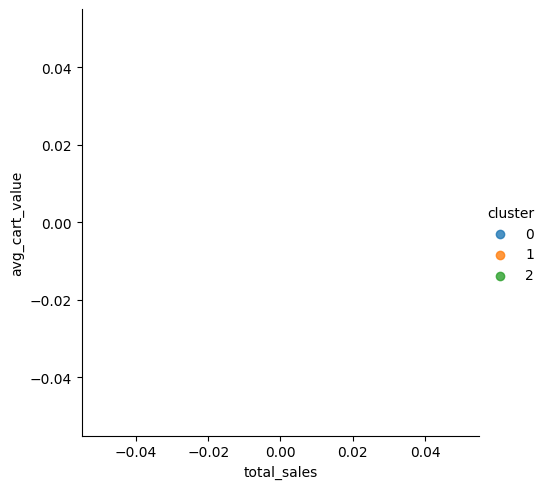

In [ ]:
# Scatterplot, colored by cluster
sns.lmplot(x='total_sales', y='avg_cart_value', hue='cluster', data=threshold_df, fit_reg=False)

In [ ]:
p_kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 123)

In [ ]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')  # or 'median'
pca_df_scaled_imputed = imputer.fit_transform(pca_df_scaled)

# Run KMeans clustering
pca_df['cluster'] = p_kmeans.fit_predict(pca_df_scaled_imputed)


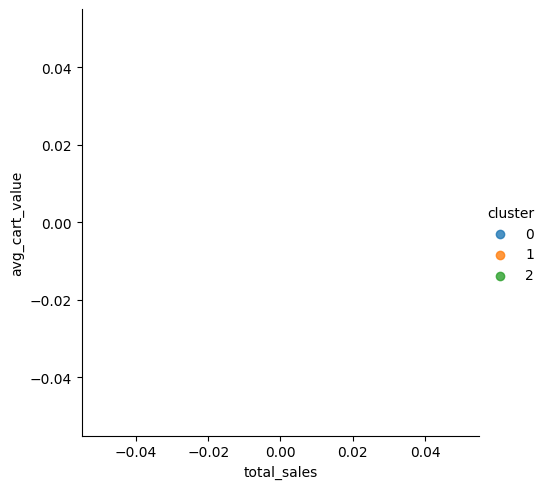

In [ ]:
# Scatterplot, colored by cluster
sns.lmplot(x='total_sales', y='avg_cart_value', hue='cluster', data=pca_df, fit_reg=False)

In [ ]:
# Similary between base_df.cluster and threshold_df.cluster
adjusted_rand_score(pca_df.cluster, threshold_df.cluster)

0.29021091627460105